In [1]:
##Step 1
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns



In [2]:
#import dataset
dataset = pd.read_csv('./data/hitters.csv')

#we want to see if based on the 1986 data whether or not we can predict 
#what league they will play in in 1987

In [3]:
dataset.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [4]:
#replace salary NA
#dataset['Salary'] = dataset['Salary'].replace('NA',0).astype(int)

imputer = Imputer(missing_values='NaN',
                  strategy='mean',
                  axis=0)

imputer = imputer.fit(dataset['Salary'].values.reshape(-1, 1))

dataset['Salary'] = imputer.transform(dataset['Salary'].values.reshape(-1, 1))



c:\users\aakash.patel\appdata\local\continuum\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
#create dummy variables

In [6]:
dataEncoded = pd.get_dummies(dataset,columns = ['League'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['Division'], drop_first=True)

dataEncoded = pd.get_dummies(dataEncoded,columns = ['NewLeague'], drop_first=True)


In [7]:
dataEncoded.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [8]:
x = dataEncoded[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary', 'League_N', 'Division_W']]
y = dataEncoded['NewLeague_N']

In [9]:
scaler = StandardScaler()

In [10]:
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [11]:
x_scaled

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W
0,-0.574071,-0.755130,-1.123591,-0.804734,-0.728308,-1.145172,-1.310194,-1.015121,-0.997117,-0.795183,-0.985636,-0.905069,-0.923478,0.560399,-0.540924,1.880899,0.000000,-0.916515,-1.025161
1,-0.430437,-0.431732,-0.433579,-1.035649,-0.383827,0.011930,1.332925,0.344876,0.179704,-0.005697,-0.113299,0.252124,0.430391,1.224048,-0.467740,0.308192,-0.149723,1.091089,0.975456
2,0.640293,0.624699,0.831443,0.580752,0.917547,1.724442,-0.903560,-0.441561,-0.398759,-0.075357,-0.404078,-0.192719,0.010354,2.108915,-0.182323,0.937275,-0.137436,-0.916515,0.975456
3,0.751283,0.861858,1.061447,0.542266,1.147201,-0.080638,0.722974,1.283860,1.312145,1.805477,1.406546,1.526538,0.351634,-0.317331,-0.701928,-0.792703,-0.088286,1.091089,-1.025161
4,-0.391264,-0.302373,-0.088573,-0.458363,-0.230724,-0.404626,-1.106877,-0.970736,-0.943555,-0.667472,-0.931677,-0.853972,-0.852222,1.841314,-0.489695,-0.635432,-1.092159,1.091089,-1.025161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.757812,0.560020,-0.433579,0.542266,-0.001070,-0.080638,-0.496927,0.023406,0.135325,-0.435270,0.060569,-0.057463,-0.458437,0.128670,-0.716565,-0.792703,0.403206,1.091089,-1.025161
318,0.725167,0.754058,-0.663583,0.965609,0.075482,2.557555,0.926291,1.233441,1.214204,-0.353999,1.613389,0.363334,2.305557,0.085854,2.005873,1.880899,0.833261,-0.916515,-1.025161
319,0.614177,0.538460,-0.893587,0.388323,-0.192448,0.613623,-0.293610,-0.408811,-0.435487,-0.725522,-0.425062,-0.712704,-0.428435,-0.898917,0.044547,-0.163620,-0.370894,-0.916515,0.975456
320,1.254003,0.926537,-0.203575,1.311981,0.458239,1.817010,0.113024,0.236714,0.213371,0.319386,0.333362,0.270158,0.269127,3.657430,0.176278,0.622733,1.042145,-0.916515,-1.025161


In [12]:
pca = PCA(0.95)

In [13]:
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca.explained_variance_ratio_

array([0.40664131, 0.22011229, 0.08892023, 0.05771616, 0.05328299,
       0.04257383, 0.0359053 , 0.0283213 , 0.02485369])

In [15]:
np.sum(pca.explained_variance_ratio_)

0.9583270973686767

In [16]:
x_pca = pca.transform(x_scaled)

In [17]:
print(x_scaled.shape)
print(x_pca.shape)

(322, 19)
(322, 9)


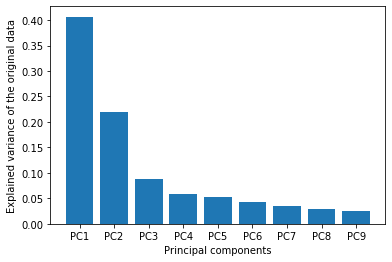

In [18]:
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal components')
plt.ylabel('Explained variance of the original data')
plt.xticks(ticks=range(0, len(pca.explained_variance_ratio_)),
                       labels=['PC{}'.format(x) for x in range(1, len(pca.explained_variance_ratio_) + 1)])
plt.show()